In [ ]:
import pandas as pd


In [ ]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/IdePHICS/FundamentalLearningEPFL/main/TP1/audit_of_political_engagement_14_2017.tab', sep = '\t')

In [ ]:
# first we want to obtain only the data we are interested in from the larger data set
data = data_raw[['numage','cut15']]
# now we rename the columns
data.columns = ['age','vote']


Value = 1.0
 Label = Remain a member of the European Union

Value = 2.0
 Label = Leave the European Union

Value = 3.0
 Label = Did not vote

Value = 4.0
 Label = Too young

Value = 5.0
 Label = Can't remember

Value = 6.0
 Label = Refused


In [ ]:
data.sort_values(by='age')
# we want to eliminate weird values like zeros we observe on the age column and also create the "Remainer" and "Brexiteer" data frames
data = data[data['age'] !=0]

Remainers = data[data['vote'] ==1]
Brexiteers = data[data['vote'] ==2]

# we can use the function len() that returns the number of items in an array to see the percentage of brexiters to the total for example

print(f"the percentage of brexiters is {len(brexiters)/(len(brexiters)+len(remainers))}")


the percentage of brexiters is 0.4114068441064639


Text(0, 0.5, '# (people)')

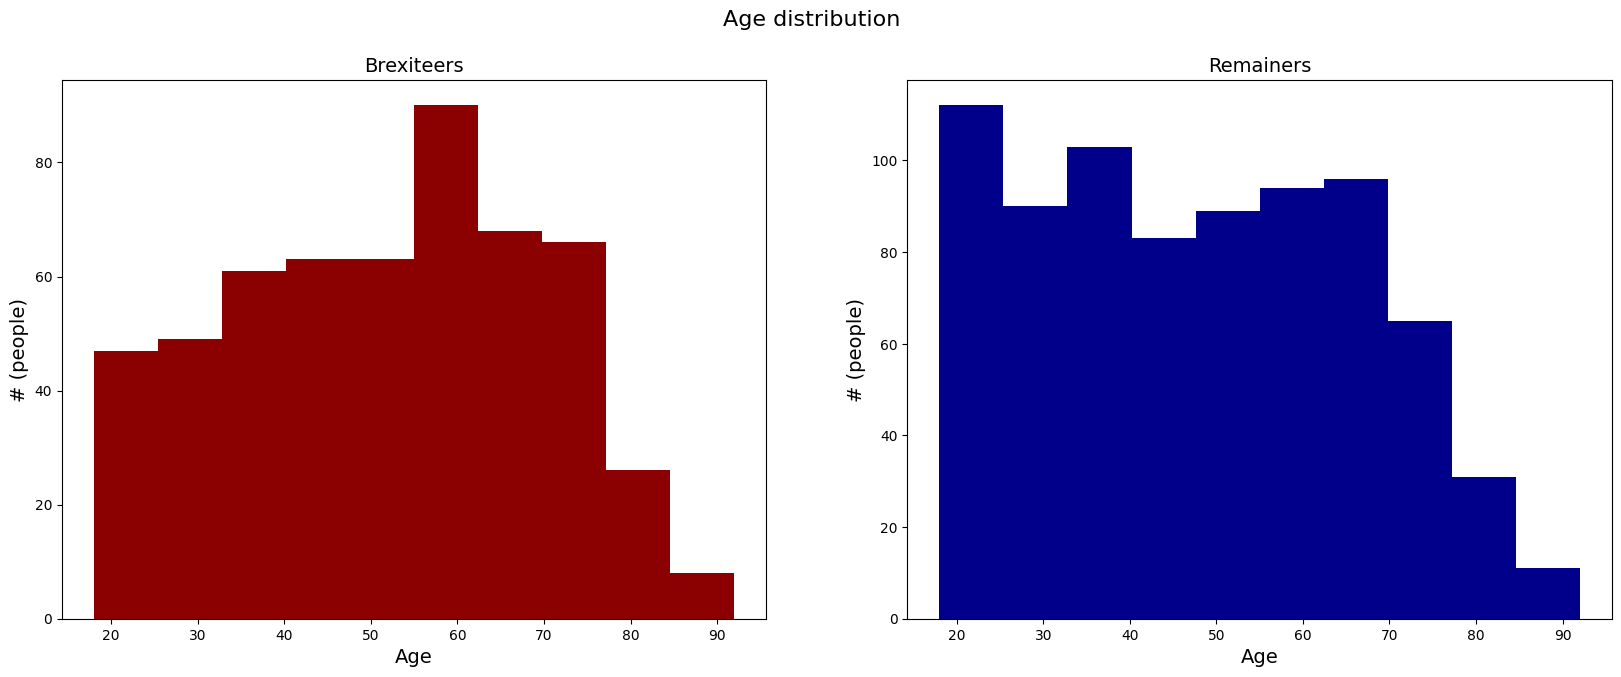

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(20,7), sharex=True)
plt.suptitle("Age distribution", fontsize=16)
ax[0].set_title(f"Brexiteers", fontsize=14)
ax[0].hist(Brexiteers['age'], color ='darkred')
ax[0].set_xlabel("Age", fontsize = 14)
ax[0].set_ylabel("# (people)", fontsize = 14)

ax[1].set_title(f"Remainers", fontsize=14)
ax[1].hist(remainers['age'], color ='darkblue')
ax[1].set_xlabel("Age", fontsize = 14)
ax[1].set_ylabel("# (people)", fontsize = 14)



In [ ]:
# using numpy lets now try and compare the averages

import numpy as np

avg_brex = np.mean(Brexiteers['age'])
avg_rem = np.mean(Remainers['age'])

dataset_property = avg_brex - avg_rem
print(f"The average age difference in the voters is {dataset_property}")




In [ ]:
#HIPOTHESIS TESTING - HOW CAN WE QUANTIFY OUR LEVEL OF CONFIDENCE IN STATING THE ABOVE RESULT IS NOT GIVEN BY LOW NUMBER OF DATA POINTS

global_stat = list(brexiteers['age']) + list (remainers['age'])

print(len(global_stat))

1315
[71, 60, 74, 61, 47, 56, 76, 35, 44, 38, 24, 53, 79, 64, 51, 31, 65, 28, 31, 21, 36, 49, 64, 49, 56, 69, 50, 51, 51, 60, 55, 19, 70, 23, 47, 64, 27, 21, 59, 61, 47, 22, 68, 30, 24, 46, 65, 70, 78, 43, 40, 59, 33, 62, 67, 30, 83, 35, 45, 76, 27, 56, 73, 74, 70, 69, 31, 50, 60, 57, 33, 30, 76, 56, 25, 32, 55, 35, 48, 38, 58, 60, 71, 83, 65, 62, 32, 51, 62, 49, 45, 71, 75, 56, 41, 20, 42, 33, 59, 89, 20, 78, 41, 69, 24, 36, 60, 59, 36, 57, 36, 41, 25, 73, 19, 44, 42, 50, 58, 27, 50, 56, 88, 35, 56, 41, 29, 57, 27, 62, 31, 57, 21, 68, 50, 48, 68, 49, 34, 58, 52, 53, 68, 60, 37, 31, 54, 56, 66, 37, 22, 65, 26, 20, 27, 52, 49, 91, 69, 27, 79, 53, 70, 29, 23, 25, 63, 21, 33, 68, 59, 62, 53, 71, 50, 80, 63, 54, 72, 59, 31, 58, 58, 72, 73, 44, 20, 41, 41, 63, 34, 73, 55, 70, 27, 50, 59, 24, 35, 79, 59, 40, 73, 68, 23, 34, 49, 63, 55, 34, 36, 40, 52, 69, 45, 71, 62, 64, 43, 74, 72, 54, 45, 63, 72, 68, 27, 48, 40, 80, 50, 23, 35, 79, 43, 31, 28, 81, 57, 66, 59, 71, 46, 60, 78, 80, 60, 24, 53

In [ ]:
#lets create 10000 new shuffled datasets and let's keep track when one difference in average ages is greater than the observed experimental one

import random

trials = 10000 ; count = 0

for dumb in range(trials):
  #compute shuffled ages, basically just an array of re-arranged ages
  random.shuffle(global_stat)
  #now we take the average of the first 541 values (number of people who voted against brexit), same for the remainder 774 who voted to leave
  avg_A = sum(global_stat[:541])/541
  avg_B = sum(global_stat[541:])/774
  #now count the times the difference is bigger than the experimental value

  diff = avg_A - avg_B

  if diff > dataset_property:
    count =+1

print(f"The average difference between the random datasets was bigger than {dataset_property} {count} times")


The average difference between the random datasets was bigger than 3.6998380833655773 1 times


In [ ]:
# WITH ONE SAMPLE HOW CAN WE CALCULATE THE CONFIDENCE INTERVAL FOR THE MEDIAN AGE OF THE BREXITEERS AND REMAINERS?

#first thing we must do it take a column of the dataset, an object which is called as "series",  and transform it into a numpy.array using pd.series.to_numpy

brexit_ages = pd.Series.to_numpy(brexiteers['age'])
remain_ages = pd.Series.to_numpy(remainers['age'])

print(f"the median age of the brexiteers is {np.median(brexit_ages)}")

the median age of the brexiteers is 53.0


Bootstrapping is a statistical method used to estimate the distribution of a sample statistic (such as mean, median, etc.) by resampling with replacement from the original dataset. The key idea behind bootstrapping is that it allows us to simulate the sampling process multiple times, creating many "new" datasets from the original data.

Resampling with replacement means that when you select a data point from the original dataset, it is returned back to the dataset before the next selection. Therefore, the same data point can appear multiple times in a single new sample.
Bootstrapping is particularly useful for estimating the variability (like confidence intervals) of a statistic, especially when the underlying distribution is unknown or the sample size is small.

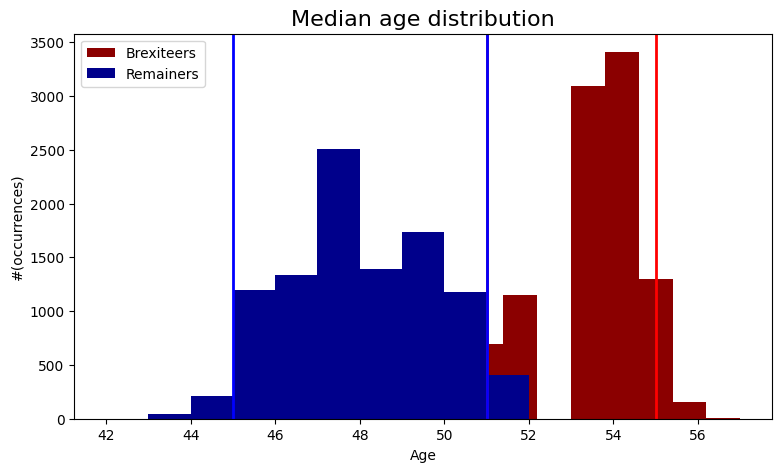

In [ ]:
# lets create an array of the new datasets created with bootstrapping

reps = 10000
n = len(brexit_ages)

np.random.seed(123)

boot_brexit = np.random.choice(brexit_ages, (reps, n), replace=True)   #if u dont specify replace it defaults to true
boot_brexit_medians = np.median(boot_brexit, axis=1) #axis=1 specifies the operator (in this case median) will be applied row wise (the direction the samples are stored)
boot_remain = np.random.choice(remain_ages, (reps,n))
boot_remain_medians = np.median(boot_remain, axis=1)


#now for the confidence interval,

boot_brexit_median_CI = np.percentile(boot_brexit_medians, [2.5, 97.5]) #means that the confidence interval contains 95% of values
boot_remain_median_CI = np.percentile(boot_remain_medians, [2.5,97.5])

#plot

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
plt.title("Median age distribution", size = 16)
ax.hist(boot_brexit_medians, color ='darkred', label = f"Brexiteers")
plt.axvline(boot_brexit_median_CI[0],color = 'red',linewidth=2)
plt.axvline(boot_brexit_median_CI[1],color = 'red',linewidth=2)
ax.hist(boot_remain_medians, color ='darkblue', label = f"Remainers")
plt.axvline(boot_remain_median_CI[0],color = 'blue',linewidth=2)
plt.axvline(boot_remain_median_CI[1],color = 'blue',linewidth=2)
ax.set(xlabel ="Age" , ylabel = "#(occurrences)")
ax.legend();
